# Regularização

In [1]:
import pandas as pd 

In [2]:
dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)
X = dados_adv.loc[:,['TV','radio','newspaper']]
y = dados_adv.loc[:,['sales']]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

## Base Line - Regressão Linear

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
linear = LinearRegression().fit(X_train,y_train)
print(linear.coef_)

[[0.04471367 0.18303312 0.00443013]]


In [6]:
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
r2_score_test = r2_score(y_test,linear.predict(X_test))
r2_score_train = r2_score(y_train,linear.predict(X_train))


print(f"Scores R^2 Treino: {str(r2_score_train)}")


print(f"Scores R^2 Teste:{str(r2_score_test)}")

print(f"MSE: {mean_squared_error(y_test,linear.predict(X_test))}") 

Scores R^2 Treino: 0.8792926617864103
Scores R^2 Teste:0.9133071815302057
MSE: 2.3249640699354255


## Regularização L2 - *Ridge*
Alpha=0 regressão linear comum

In [8]:
from sklearn.linear_model import Ridge

In [9]:
ridge = Ridge(alpha = 0)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[[0.04471367 0.18303312 0.00443013]]


In [10]:
r2_ridge_test = r2_score(y_test,ridge.predict(X_test))
r2_ridge_train = r2_score(y_train,ridge.predict(X_train))
print(f"Scores R^2 Treino: {str(r2_ridge_train)}")


print(f"Scores R^2 Teste: {str(r2_ridge_test)}")
print(f"MSE: {mean_squared_error(y_test,ridge.predict(X_test))}")

Scores R^2 Treino: 0.8792926617864103
Scores R^2 Teste: 0.9133071815302057
MSE: 2.3249640699354255


Utilizando diferentes valores de Alpha.
A cada novo valor de Alpha, os valores dos parâmetros da função de regressão se aproxima de zero

In [11]:
import numpy as np

In [12]:
alphas = 10**np.linspace(-2,3,100)

In [13]:
MSEs  = []
coefs = []

for a in alphas:
    ridge = Ridge(alpha=a, normalize=True)
    ridge.fit(X_train, y_train) 
    MSEs.append(mean_squared_error(y_test,ridge.predict(X_test)))
    coefs.append(ridge.coef_.ravel().tolist())


In [14]:
#np.shape(coefs)
coefs = np.array(coefs)

In [15]:
coefs.shape

(100, 3)

Vamos verificar a evolução dos valores dos coeficientes conforme o valor de $\alpha$ muda.

In [16]:
import matplotlib.pyplot as plt 

Text(0, 0.5, 'Parameters')

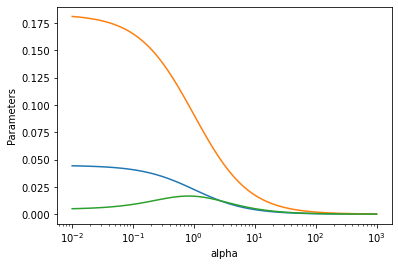

In [17]:
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Parameters')

Comparando MSE com diferentes valores de Alpha


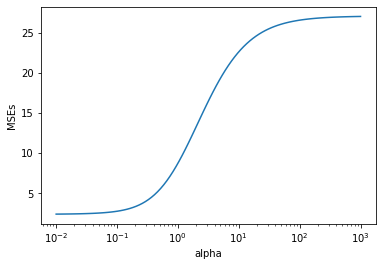

In [18]:
plt.plot(alphas, MSEs)
#plt.plot(MSEs)
plt.xscale('log')
plt.ylabel('MSEs')
plt.xlabel('alpha')
plt.show()

### RidgeCV
Implementa busca por um alpha por meio de um critério de avaliação (score). Documentação dos [critérios de avaliação](https://scikit-learn.org/stable/modules/model_evaluation.html)
Vamos realizar o *fit* do nosso modelo com validação cruzada - vamos fazer múltiplos *fits*, um para cada valor de $\alpha$

In [19]:
from sklearn.linear_model import RidgeCV

In [20]:
ridgecv = RidgeCV(alphas=alphas, normalize=True)

#ridgecv = RidgeCV(alphas = alphas, scoring = 'r2', normalize = True)
#ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
#ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_absolute_error', normalize = True)

ridgecv.fit(X_train, y_train)
print(ridgecv.alpha_)
print(ridgecv.coef_)
print(mean_squared_error(y_test, ridgecv.predict(X_test)))

0.01
[[0.04427904 0.18104502 0.00498734]]
2.3496478939251224


## Regularização L1 - Lasso
Max_iter - número máximo de iterações

In [21]:
from sklearn.linear_model import Lasso 

In [22]:
#lasso = Lasso(max_iter = 10000, normalize = True)
MSEs = []
coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, normalize=True)
    lasso.fit(X_train, y_train)
    MSEs.append(mean_squared_error(y_test,lasso.predict(X_test)))
    coefs.append(lasso.coef_)
    

Text(0, 0.5, 'Parameters')

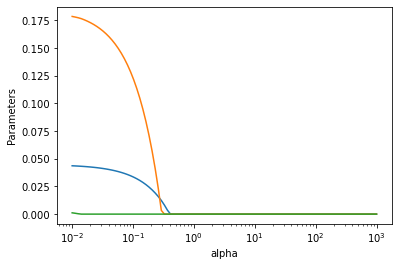

In [23]:
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Parameters')

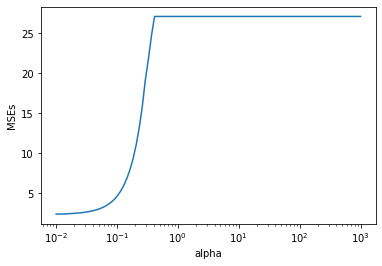

In [24]:
plt.plot(alphas, MSEs)
#plt.plot(MSEs)
plt.xscale('log')
plt.ylabel('MSEs')
plt.xlabel('alpha')
plt.show()

### LassoCV

In [25]:
from sklearn.linear_model import LassoCV

In [26]:
#lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)

lassocv = LassoCV(alphas=alphas, normalize=True)#, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train.values.ravel())

print(lassocv.alpha_)

0.01


In [27]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_test, lasso.predict(X_test)))
print(lasso.coef_)

2.3249924429292
[0.04471272 0.18299814 0.00441754]


## Regularização em Árvores de Regressão
Vamos criar um modelo baseline e avaliar o desempenho nas partições de Treino e Teste

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
tree = DecisionTreeRegressor().fit(X_train,y_train)
r2_tree = r2_score(y_test,tree.predict(X_test))
r2_tree_treino = r2_score(y_train,tree.predict(X_train))

print("Scores R^2 Treino:")
print("tree: "+str(r2_tree_treino))


print("Scores R^2 Teste:")
print("tree: "+str(r2_tree))

print(mean_squared_error(y_test,tree.predict(X_test))) 

Scores R^2 Treino:
tree: 1.0
Scores R^2 Teste:
tree: 0.940309673770442
1.6008000000000002


Vamos regular a profundidade da árvore

In [30]:
depth_test =  np.linspace(1., 50., num=100)

errors_train = []
errors_test = []
for depth in depth_test:
    #modelo_regularizado =  DecisionTreeRegressor(max_depth=depth).fit(X_train, y_train.values.ravel())
    modelo_regularizado =  DecisionTreeRegressor(max_depth=depth).fit(X_train, y_train)
    y_pred = modelo_regularizado.predict(X_test)
    errors_train.append(mean_squared_error(y_train, modelo_regularizado.predict(X_train)))
    errors_test.append(mean_squared_error(y_test, y_pred))

errors_test = np.array(errors_test)

print(f"Menor valor de erro na partição de teste: {np.amin(errors_test)}")



Menor valor de erro na partição de teste: 1.4088


Vamos visualizar a evolução do `MSE` enquanto variamos a profundidade da árvore.

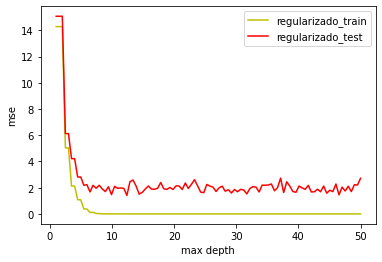

In [31]:
plt.plot(depth_test, errors_train,color='y',label='regularizado_train')
plt.plot(depth_test, errors_test,color='r',label='regularizado_test')    


plt.xlabel('max depth')
plt.ylabel('mse')
plt.legend()